In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score
import joblib

In [3]:
# import dataset
data = pd.read_csv("iphone_purchase_dataset/iphone_purchase_records.csv")
data.head()

Gender  Age  Salary  Purchase Iphone
0    Male   19   19000                0
1    Male   35   20000                0
2  Female   26   43000                0
3  Female   27   57000                0
4    Male   19   76000                0

In [4]:
## EDA and Data Visualization

In [5]:
# let's make a copy of the data set and call it "df" which means dataframe
df = data.copy()
df.head()

Gender  Age  Salary  Purchase Iphone
0    Male   19   19000                0
1    Male   35   20000                0
2  Female   26   43000                0
3  Female   27   57000                0
4    Male   19   76000                0

In [6]:
# how many rows (data points) and columns (categories) are there? the answer will show up as (rows, columns)
df.shape

(400, 4)

In [7]:
# print the summary of the dataframe's structure and content
print("Summary of the DataFrame's structure and content:")
df.info()

Summary of the DataFrame's structure and content:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [8]:
# let's view the statistics on our data
df.describe()

Age         Salary  Purchase Iphone
count  400.000000     400.000000       400.000000
mean    37.655000   69742.500000         0.357500
std     10.482877   34096.960282         0.479864
min     18.000000   15000.000000         0.000000
25%     29.750000   43000.000000         0.000000
50%     37.000000   70000.000000         0.000000
75%     46.000000   88000.000000         1.000000
max     60.000000  150000.000000         1.000000

In [9]:
df.corr(numeric_only=True)

Age    Salary  Purchase Iphone
Age              1.000000  0.155238         0.622454
Salary           0.155238  1.000000         0.362083
Purchase Iphone  0.622454  0.362083         1.000000

In [10]:
print("The skewness of the dataset is as follows:")
print(df.skew(numeric_only=True))

The skewness of the dataset is as follows:
Age                0.231337
Salary             0.495024
Purchase Iphone    0.596903
dtype: float64


In [11]:
# how many missing information is there in the dataset
df.isnull().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

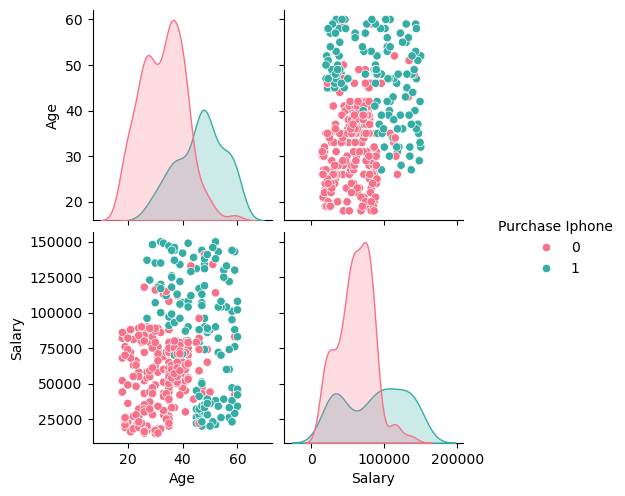

In [12]:
sns.pairplot(data, hue='Purchase Iphone', vars=['Age', 'Salary'], palette='husl')
plt.savefig("pair_plot.png")
plt.show()

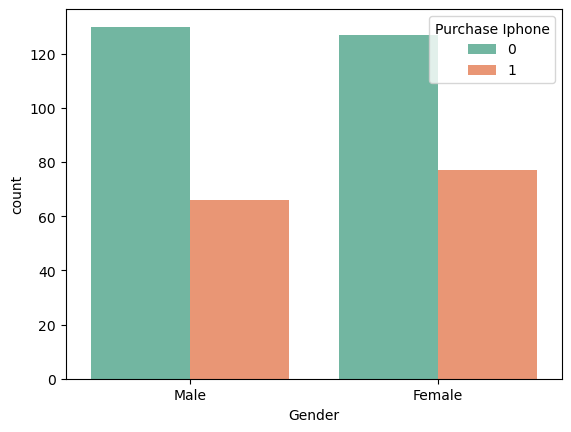

In [13]:
sns.countplot(x='Gender', hue='Purchase Iphone', data=data, palette='Set2')
plt.savefig('gender_counterplot.png')
plt.show()

In [ ]:
## Model Building - KNeighborsClassifier Model

In [14]:
df.columns

Index(['Gender', 'Age', 'Salary', 'Purchase Iphone'], dtype='object')

In [16]:
X = data[['Age', 'Salary']]
print(X)

     Age  Salary
0     19   19000
1     35   20000
2     26   43000
3     27   57000
4     19   76000
..   ...     ...
395   46   41000
396   51   23000
397   50   20000
398   36   33000
399   49   36000

[400 rows x 2 columns]


In [17]:
y = data['Purchase Iphone']
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchase Iphone, Length: 400, dtype: int64


In [18]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1234)

In [19]:
X_train.shape, X_test.shape

((320, 2), (80, 2))

In [ ]:
from math import sqrt  ##### Standard method to select K
sqrt(data.shape[0])  # the square root of 400 (400 data points/rows)

20.0

In [25]:
clf = KNeighborsClassifier(n_neighbors=15) ####
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [26]:
pred = clf.predict(X_test)
pred

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [28]:
print("The accuracy of the KNeighborsClassifier model is",round((accuracy_score(y_test,pred)*100),2),"%")

The accuracy of the KNeighborsClassifier model is 87.5 %


In [29]:
precision = round((precision_score(y_test,pred)*100),2)
print(f'The precision of the KNeighborsClassifier model is: {precision}',"%")

The precision of the KNeighborsClassifier model is: 86.96 %


<Axes: >

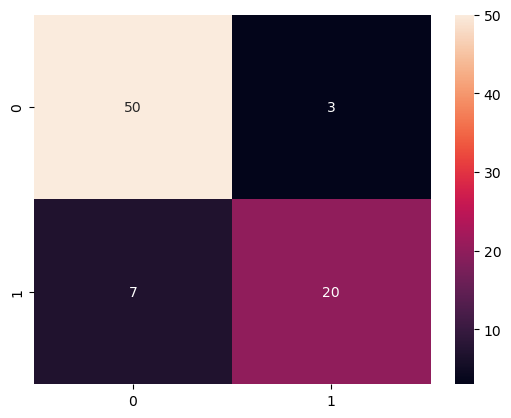

In [32]:
sns.heatmap(confusion_matrix(y_test,pred),annot = True)

In [33]:
# Error method // Also called as Elbow Method
error = []
for i in range(1,31): ### considering k value from 1 to 30
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    predict_i = clf.predict(X_test)
    error.append(1 - accuracy_score(y_test,predict_i))

In [34]:
error

[0.23750000000000004,
 0.21250000000000002,
 0.17500000000000004,
 0.17500000000000004,
 0.15000000000000002,
 0.15000000000000002,
 0.16249999999999998,
 0.16249999999999998,
 0.15000000000000002,
 0.16249999999999998,
 0.16249999999999998,
 0.13749999999999996,
 0.16249999999999998,
 0.16249999999999998,
 0.125,
 0.16249999999999998,
 0.1875,
 0.17500000000000004,
 0.16249999999999998,
 0.16249999999999998,
 0.15000000000000002,
 0.17500000000000004,
 0.15000000000000002,
 0.16249999999999998,
 0.17500000000000004,
 0.1875,
 0.21250000000000002,
 0.1875,
 0.17500000000000004,
 0.17500000000000004]

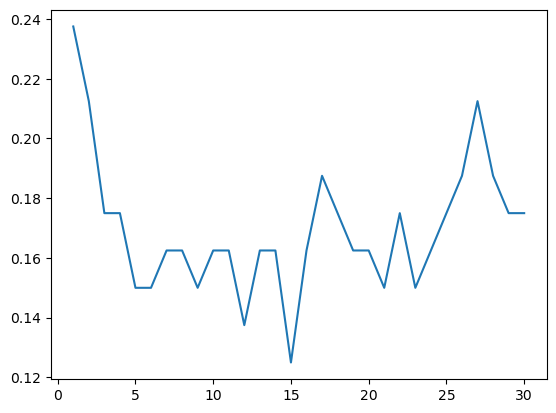

In [35]:
import matplotlib.pyplot as plt
plt.plot(range(1,31), error)

In [ ]:
## logistic regression

In [36]:
lg_model = LogisticRegression()
lg_model_fit = lg_model.fit(X_train,y_train)
pred1 = lg_model_fit.predict(X_test)

In [37]:
pred1

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [38]:
print("The accuracy of the Logistic Regression model is",round((accuracy_score(y_test,pred1)*100),2),"%")

The accuracy of the Logistic Regression model is 83.75 %


In [ ]:
## Decision Tree